In [80]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import numpy as np

In [82]:
from wm import Image as Image
from wm.moments import RadialHarmonicFourierMoment
from wm.moments import ZernikeMoment, PseudoZernikeMoment
from wm.metrics import PSNR

In [83]:
w = np.random.randint(2, size=128)

## RHFM

In [5]:
%%time
N = 256
order = 50
im = Image('images/monochrome/lena_'+str(N)+'.png', colored=False)
RHFM = RadialHarmonicFourierMoment(order, N, Vfile='V_RHFM_'+str(N)+'.h5')

CPU times: user 861 ms, sys: 2.33 s, total: 3.19 s
Wall time: 22.2 s


In [6]:
%%time
E = RHFM.encode(im, w, verbose=True)

CPU times: user 24.4 s, sys: 0 ns, total: 24.4 s
Wall time: 24.1 s


40.50742358569071


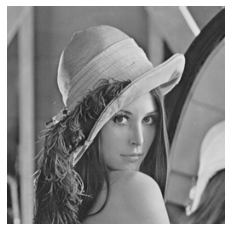

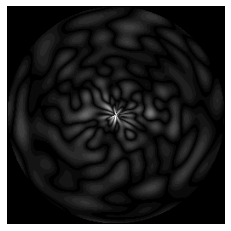

In [7]:
print(PSNR(im.im, E.im))
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [8]:
%%time
w2 = RHFM.decode(E, pos=len(w))
print(np.sum(np.abs(w - np.array(w2))))

1
CPU times: user 1.21 s, sys: 0 ns, total: 1.21 s
Wall time: 1.19 s


In [9]:
RHFM.unloadVfile()

## ZM

In [ ]:
%%time
N = 128
order = 50
im = Image('images/monochrome/lena_'+str(N)+'.png', colored=False)
ZM = ZernikeMoment(order, N, Vfile='V_ZM_'+str(N)+'.h5')

In [ ]:
%%time
E = ZM.encode(im, w, verbose=True)

In [ ]:
a=0
for i in range(1,17):
    for j in range(i//2):
        a += (i+1)**(-1)
255*((10**(40/10)*np.pi/24*a)**(-0.5))

In [ ]:
print(PSNR(im.im, E.im))
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [ ]:
%%time
w2 = ZM.decode(E, pos=len(w))
print(np.sum(np.abs(w - np.array(w2))))

In [ ]:
ZM.unloadVfile()

## PZM

In [ ]:
%%time
N = 128
order = 50
im = Image('images/monochrome/lena_'+str(N)+'.png', colored=False)
PZM = PseudoZernikeMoment(order, N, Vfile='V_PZM_'+str(N)+'.h5')

In [ ]:
%%time
E = PZM.encode(im, w, verbose=True)

In [ ]:
print(PSNR(im.im, E.im))
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [ ]:
%%time
w2 = PZM.decode(E, pos=len(w))
print(np.sum(np.abs(w - np.array(w2))))

In [ ]:
PZM.unloadVfile()